In [3]:
import pandas as pd

In [9]:
df_data = pd.read_csv('/home/ankur/Desktop/ML_DL_Projects/data/mnsit_handwritten_digits/train.csv')
df_data.shape

(42000, 785)

In [11]:
df_data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
countna= df_data.isna().sum().sum()
countna

np.int64(0)

In [18]:
Y = df_data['label']
X = df_data.iloc[:,1:]

In [19]:
X.shape, Y.shape

((42000, 784), (42000,))

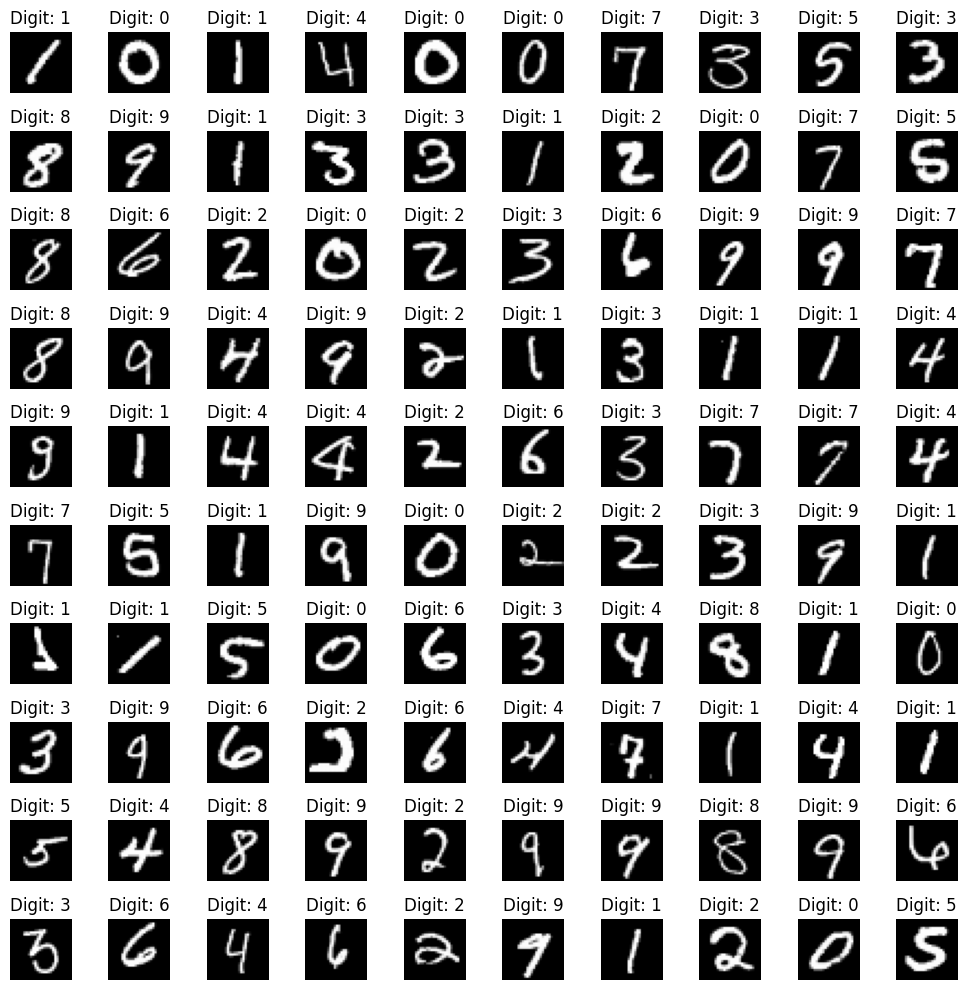

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize first 9 digits
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
axes = axes.ravel()

for i in range(100):
    axes[i].imshow(X[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Digit: {Y[i]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [40]:
Y.shape
Y.value_counts().sort_index()
Y.isna().sum()

np.int64(0)

In [52]:
from unicodedata import category
import tensorflow as tf
y_one_hot = tf.keras.utils.to_categorical(Y, num_classes=10)
y_one_hot.shape
y_one_hot[2:8]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [53]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y_one_hot,test_size=0.20,random_state=42,stratify=y_one_hot)
print(X_train.shape,
X_test.shape,
Y_train.shape,
Y_test.shape)


(33600, 784) (8400, 784) (33600, 10) (8400, 10)


In [58]:
X_train,X_CV,Y_train,Y_CV = train_test_split(X_train,Y_train,test_size=0.10,random_state=42,stratify=Y_train)
print(X_train.shape,
X_CV.shape,
Y_train.shape,
Y_CV.shape)

(30240, 784) (3360, 784) (30240, 10) (3360, 10)


In [83]:
from os import name
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential([
    Dense(units=25, activation='relu',name='L1'),
    Dense(units=15, activation='relu',name='L2'),
    Dense(units=10, activation='linear',name='L3'),
])

In [84]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[
        'accuracy',
        'categorical_accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
    ]
)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [86]:
history = model.fit(
    X_train,Y_train,
    epochs=40
)

Epoch 1/40
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3608 - categorical_accuracy: 0.3608 - loss: 1.6684 - precision: 0.2004 - recall: 0.2674
Epoch 2/40
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3810 - categorical_accuracy: 0.3810 - loss: 1.5953 - precision: 0.2042 - recall: 0.3019
Epoch 3/40
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4414 - categorical_accuracy: 0.4414 - loss: 1.4491 - precision: 0.1762 - recall: 0.7200
Epoch 4/40
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4797 - categorical_accuracy: 0.4797 - loss: 1.3374 - precision: 0.1713 - recall: 0.8974
Epoch 5/40
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5295 - categorical_accuracy: 0.5295 - loss: 1.2211 - precision: 0.1615 - recall: 0.9798
Epoch 6/40
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5929 - categorical_accuracy: 0.5929 - loss: 1.0479 - precision: 0.1604 - recall: 0.9755
Epoch 7/40
945/945 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7435 - cat

   prediction = model.predict(X_train[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

In [89]:
single_image = X_CV[2]

In [94]:
single_image.shape
single_image_reshaped = single_image.reshape(1, -1)
single_image_reshaped.shape

(1, 784)

In [95]:
prediction = model.predict(single_image_reshaped)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[-2.6157298 , -2.2346468 ,  2.9171987 ,  5.87918   , -1.482086  ,
        -0.9082801 , -3.3651924 , -0.04634273,  3.9237192 ,  0.4761592 ]],
      dtype=float32)

In [97]:
predicted_class = np.argmax(prediction)
predicted_class

np.int64(3)

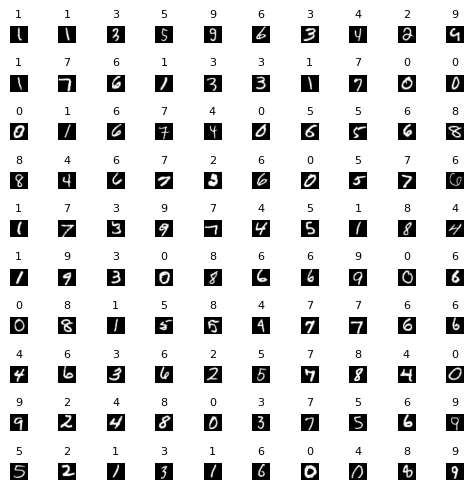

In [101]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(5, 5))
axes = axes.ravel()

for i in range(100):
    axes[i].imshow(X_CV[i].reshape(28, 28), cmap='gray')
    # Get prediction and class
    prediction = model.predict(X_CV[i].reshape(1, -1), verbose=0)
    predicted_class = np.argmax(prediction)
    axes[i].set_title(f'{predicted_class}', fontsize=8)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

=== Model Evaluation ===
loss: 0.3921
compile_metrics: 0.9417


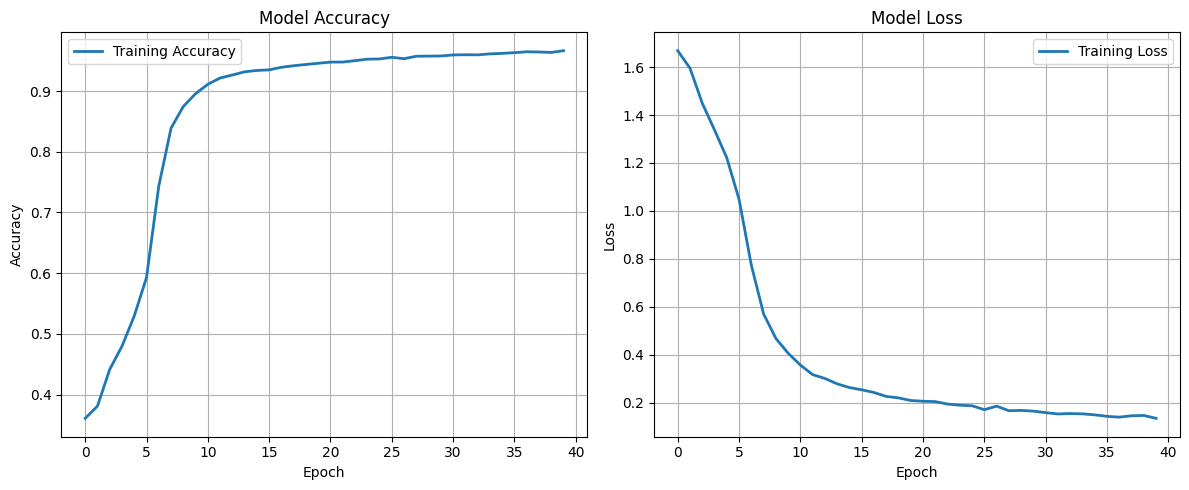

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate model
print("=== Model Evaluation ===")
val_results = model.evaluate(X_CV, Y_CV, verbose=0)

# Print all metrics
metric_names = model.metrics_names
for i, (name, value) in enumerate(zip(metric_names, val_results)):
    print(f"{name}: {value:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
elif 'val_sparse_categorical_accuracy' in history.history:
    plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy', linewidth=2)

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
if 'loss' in history.history:
    plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [104]:
test_results = model.evaluate(X_test, Y_test, verbose=0)
test_results

[0.39134109020233154,
 0.9351190328598022,
 0.9351190328598022,
 0.1362345814704895,
 0.9939285516738892]

In [105]:
import numpy as np
from sklearn.metrics import classification_report, precision_score, recall_score

# 1. Get model predictions (as class indices)
y_pred_logits = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_logits, axis=1)

# 2. If Y_test is one-hot, convert to class indices
if len(Y_test.shape) > 1 and Y_test.shape[1] > 1:
    y_true = np.argmax(Y_test, axis=1)
else:
    y_true = Y_test

# 3. Print classification report (includes precision and recall per class)
print(classification_report(y_true, y_pred, digits=4))

# 4. Or get precision and recall as arrays (per class)
precision_per_class = precision_score(y_true, y_pred, average=None)
recall_per_class = recall_score(y_true, y_pred, average=None)

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)

              precision    recall  f1-score   support

           0     0.9823    0.9371    0.9592       827
           1     0.9869    0.9669    0.9768       937
           2     0.9180    0.9521    0.9347       835
           3     0.9128    0.9506    0.9313       870
           4     0.9301    0.9312    0.9306       814
           5     0.9396    0.8814    0.9096       759
           6     0.9255    0.9468    0.9360       827
           7     0.9654    0.9511    0.9582       880
           8     0.8632    0.9077    0.8849       813
           9     0.9286    0.9153    0.9219       838

    accuracy                         0.9351      8400
   macro avg     0.9352    0.9340    0.9343      8400
weighted avg     0.9361    0.9351    0.9353      8400

Precision per class: [0.98225602 0.9869281  0.91801386 0.91280353 0.93006135 0.93960674
 0.92553191 0.96539792 0.86315789 0.92857143]
Recall per class: [0.93712213 0.96691569 0.95209581 0.95057471 0.93120393 0.88142292
 0.94679565 0.95113636